In [1]:
!pip install papermill

In [2]:
import papermill as pm
import networkx as nx
import matplotlib.pyplot as plt
import json

def run_cicd(config_dict):
    # Save configuration to JSON file
    with open("pipeline_config.json", "w") as json_file:
        json.dump(config_dict, json_file, indent=4)

    # Define Jupyter notebooks and DAG nodes
    notebooks = {
        "Init_Data.ipynb": "Get Labeled Data",
        "Setup_Feature_Store.ipynb": "Data Preprocessing",
        "Train_XGB.ipynb": "Model Training & Store",
        "Deployment_Monitoring.ipynb": "Model Deployment and Monitoring",
    }

    # Define DAG structure
    dag = nx.DiGraph()
    dag.add_edges_from([
        ("Get Labeled Data", "Data Preprocessing"),
        ("Data Preprocessing", "Model Training & Store"),
        ("Model Training & Store", "Model Deployment and Monitoring")
    ])

    # Track execution results
    execution_results = {}

    def execute_notebook(notebook_path, node_name):
        """Executes a Jupyter notebook and updates DAG if it fails."""
        try:
            pm.execute_notebook(
                notebook_path,
                f"executed_{notebook_path}",  # Save output notebook
                log_output=True
            )
            execution_results[node_name] = "success"
            return True
        except Exception as e:
            execution_results[node_name] = "failed"
            print(f"Notebook {notebook_path} failed: {e}")

            # Mark failure in DAG
            dag.nodes[node_name]["color"] = "red"

            # Add failure edge ONLY if the node fails
            failure_edges = {
                "Data Preprocessing": "Preprocessing Failed",
                "Model Training & Store": "Training Failed",
                "Model Deployment and Monitoring": "Deployment Failed"
            }
            
            if node_name in failure_edges:
                failure_node = failure_edges[node_name]
                dag.add_edge(node_name, failure_node)
                dag.nodes[failure_node]["color"] = "red"

            # Save execution results
            save_results()

            # Show failure visualization
            plot_dag(dag, "CI/CD Pipeline Status - FAILURE")

            # **Stop pipeline execution immediately**
            raise RuntimeError(f"Pipeline stopped due to failure in {node_name}")

    def save_results():
        """Save pipeline execution results to a JSON file."""
        with open("pipeline_results.json", "w") as result_file:
            json.dump(execution_results, result_file, indent=4)

    def plot_dag(dag, title="CI/CD Pipeline Status"):
        """Plots the DAG with failed nodes highlighted."""
        plt.figure(figsize=(10, 6))
        pos = nx.spring_layout(dag)

        # Determine node colors based on execution status
        node_colors = [
            "red" if dag.nodes.get(node, {}).get("color") == "red" else "lightblue"
            for node in dag.nodes
        ]

        nx.draw(dag, pos, with_labels=True, node_color=node_colors, edge_color="gray", node_size=3000, font_size=10)
        plt.title(title)
        plt.show()

    # Execute Notebooks in Order
    for notebook, node in notebooks.items():
        success = execute_notebook(notebook, node)
        if not success:
            break  # **Stop execution on failure**

    # Save final execution results
    save_results()

    # Show final pipeline status if all passed
    plot_dag(dag, "CI/CD Pipeline Status - SUCCESS")


Executing:   0%|          | 0/16 [00:00<?, ?cell/s]

/tmp/ipykernel_513/3350967399.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)



Executing:   0%|          | 0/7 [00:00<?, ?cell/s]

/tmp/ipykernel_548/537684722.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)

/tmp/ipykernel_548/4109648834.py:20: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_all_features = pd.read_sql(query, connection)



Executing:   0%|          | 0/25 [00:00<?, ?cell/s]

/tmp/ipykernel_617/530253379.py:16: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)

[I 2025-03-02 21:25:37,226] A new study created in memory with name: no-name-6f2c9672-485c-44bb-80fa-2bc667be70df



Notebook Train_XGB.ipynb failed: 
---------------------------------------------------------------------------
Exception encountered at "In [12]":
---------------------------------------------------------------------------
ValueError                                Traceback (most recent call last)
Cell In[12], line 26
     23 study = optuna.create_study(direction="maximize")
     24 study.optimize(xgb_objective, n_trials=N_TRIALS)
---> 26 best_params = study.best_params
     27 best_params['max_depth'] = int(best_params['max_depth'])

File /opt/conda/lib/python3.11/site-packages/optuna/study/study.py:119, in Study.best_params(self)
    107 @property
    108 def best_params(self) -> dict[str, Any]:
    109     """Return parameters of the best trial in the study.
    110 
    111     .. note::
   (...)
    116 
    117     """
--> 119     return self.best_trial.params

File /opt/conda/lib/python3.11/site-packages/optuna/study/study.py:162, in Study.best_trial(self)
    156 if self._is_mul

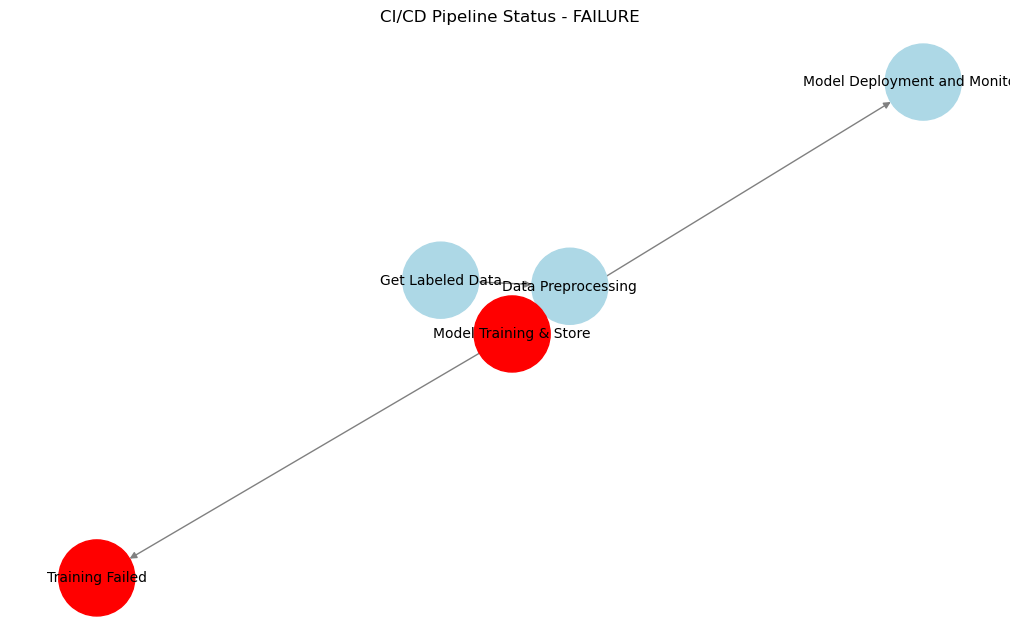

RuntimeError: Pipeline stopped due to failure in Model Training & Store

In [3]:
fail_config = {
    "N_Trials": -1.23
}
run_cicd(fail_config)

Executing:   0%|          | 0/16 [00:00<?, ?cell/s]

/tmp/ipykernel_734/3350967399.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)



Executing:   0%|          | 0/7 [00:00<?, ?cell/s]

/tmp/ipykernel_771/537684722.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)

/tmp/ipykernel_771/4109648834.py:20: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_all_features = pd.read_sql(query, connection)



Executing:   0%|          | 0/25 [00:00<?, ?cell/s]

/tmp/ipykernel_837/530253379.py:16: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)

[I 2025-03-02 21:32:52,163] A new study created in memory with name: no-name-5a4e90e0-aa3a-4f4a-bd64-445cbb1b2e57

[I 2025-03-02 21:32:52,393] Trial 0 finished with value: 0.6370214213858809 and parameters: {'learning_rate': 0.18960849349554365, 'max_depth': 5, 'min_child_weight': 6.34158821166558, 'colsample_bytree': 0.35158547345322544, 'subsample': 0.8292140641566549}. Best is trial 0 with value: 0.6370214213858809.

[I 2025-03-02 21:32:52,596] Trial 1 finished with value: 0.640515710988816 and parameters: {'learning_rate': 0.1359193727263146, 'max_depth': 6, 'min_child_weight': 2.6450293002099037, 'colsample_bytree': 0.36802521618836925, 'subsample': 0.8407364175263596}. Best is trial 1 with value: 0.6405157109

Executing:   0%|          | 0/21 [00:00<?, ?cell/s]

/tmp/ipykernel_952/2465601509.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  label_proportions = y_train.groupby(X_train_final["facet_category"]).mean()



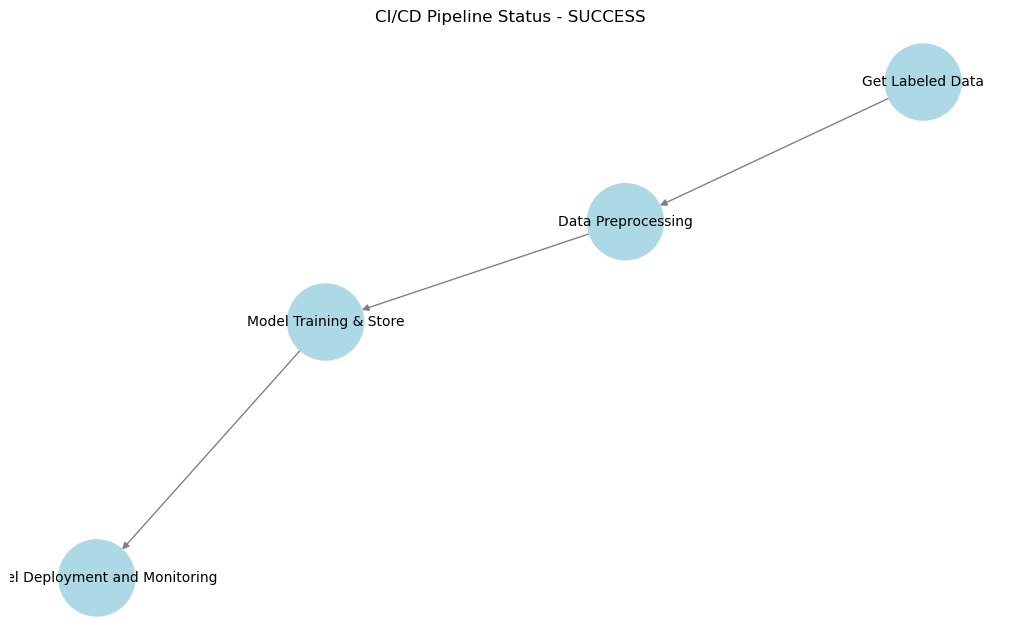

In [4]:
success_config = {
    "N_Trials": int(1000)
}
run_cicd(success_config)